0.0 1.0 0.0 1.0
[[False False False ... False False False]
 [ True  True  True ... False False False]
 [False False False ...  True False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [ True  True  True ... False False False]]


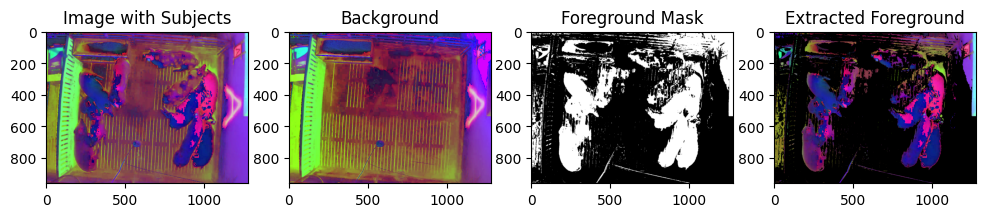

In [11]:
import numpy as np
import imageio.v3 as iio
import matplotlib.pyplot as plt
import skimage
from skimage import io, morphology
from skimage.transform import resize

# Load images
background = io.imread("background3.png") / 255
background = background[..., :3] 
background = skimage.color.rgb2hsv(background)

path = "/data/bioeng/pigs/videosPenA_2018_12_04_9h04_12h14/1_Manual Record_2018-12-04 09-04-54_2018-12-04 09-17-31.mp4"
with_subjects = iio.imread(path, index=100)

# Resize frame to match background dimensions
# with_subjects_resized = resize(with_subjects, background.shape, anti_aliasing=True)
# with_subjects_resized =  skimage.color.rgb2hsv(with_subjects_resized)

with_subjects_resized = skimage.color.rgb2hsv(with_subjects)

print(with_subjects_resized.min(), with_subjects_resized.max(), background.min(), background.max())

# Compute mean squared difference across RGB channels
diff = np.sqrt(((with_subjects_resized - background) ** 2)).mean(axis=2)

# Compute threshold (Otsu)
threshold = 0.15

# Create foreground mask
foreground_mask = diff >= threshold

# Refining the mask
# foreground_mask = morphology.remove_small_objects(foreground_mask, 500)
# foreground_mask = morphology.closing(foreground_mask, morphology.disk(3))

# Apply mask to extract foreground
foreground = with_subjects_resized * foreground_mask[..., np.newaxis]
print(foreground_mask)

# Show results
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
ax[0].imshow(with_subjects_resized)
ax[0].set_title("Image with Subjects")
ax[1].imshow(background)
ax[1].set_title("Background")
ax[2].imshow(foreground_mask, cmap='gray')
ax[2].set_title("Foreground Mask")
ax[3].imshow(foreground)
ax[3].set_title("Extracted Foreground")
plt.show()


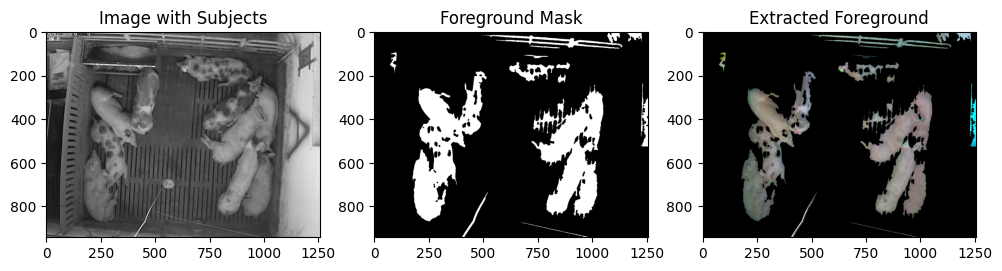

In [1]:
import numpy as np
import imageio.v3 as iio
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology
from skimage.transform import resize

# Load images
background = io.imread("background.png")

path = "/data/bioeng/pigs/videosPenA_2018_12_04_9h04_12h14/1_Manual Record_2018-12-04 09-04-54_2018-12-04 09-17-31.mp4"

with_subjects = iio.imread(path, index=100)

# Convert to grayscale
bg_gray = color.rgb2gray(background)
ws_gray = color.rgb2gray(with_subjects)

# Resize the video frame to match the background dimensions
ws_gray = resize(ws_gray, bg_gray.shape, anti_aliasing=True)

# Compute absolute difference
diff = np.abs(ws_gray - bg_gray)

# Apply threshold to get foreground mask
threshold = filters.threshold_otsu(diff)
foreground_mask = diff > threshold

# Refine mask with morphological operations
foreground_mask = morphology.remove_small_objects(foreground_mask, 500)
foreground_mask = morphology.closing(foreground_mask, morphology.disk(3))

# Resize the RGB image to match background dimensions
with_subjects_resized = resize(with_subjects, (*bg_gray.shape, 3), anti_aliasing=True)

# Apply mask to get the foreground
foreground = with_subjects_resized * foreground_mask[..., np.newaxis]  # Apply mask to all channels

# Show results
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(ws_gray, cmap='gray')
ax[0].set_title("Image with Subjects")
ax[1].imshow(foreground_mask, cmap='gray')
ax[1].set_title("Foreground Mask")
ax[2].imshow(foreground)
ax[2].set_title("Extracted Foreground")
plt.show()


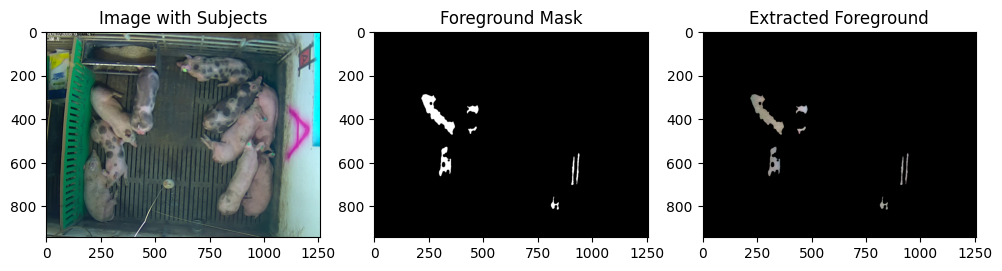

In [8]:
import numpy as np
import imageio.v3 as iio
import matplotlib.pyplot as plt
from skimage import io, filters, morphology
from skimage.transform import resize
from skimage.filters import gaussian

# Load images
background = io.imread("background.png")
path = "/data/bioeng/pigs/videosPenA_2018_12_04_9h04_12h14/1_Manual Record_2018-12-04 09-04-54_2018-12-04 09-17-31.mp4"
with_subjects = iio.imread(path, index=100)

# Resize the video frame to match the background dimensions
with_subjects_resized = resize(with_subjects, background.shape, anti_aliasing=True)

# Apply Gaussian blur to reduce lighting differences
background_blur = gaussian(background, sigma=2, channel_axis=-1)
with_subjects_blur = gaussian(with_subjects_resized, sigma=2, channel_axis=-1)

# Compute squared Euclidean distance in RGB space
diff = np.sum((with_subjects_blur - background_blur) ** 2, axis=2)

# Use a percentile threshold to determine the foreground mask
threshold = np.percentile(diff, 98)  # Adjust this percentile if needed
foreground_mask = diff > threshold

# Refine mask with morphological operations
foreground_mask = morphology.remove_small_objects(foreground_mask, 500)
foreground_mask = morphology.closing(foreground_mask, morphology.disk(5))

# Apply mask to extract the foreground
foreground = with_subjects_resized * foreground_mask[..., np.newaxis]

# Show results
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(with_subjects_resized)
ax[0].set_title("Image with Subjects")
ax[1].imshow(foreground_mask, cmap='gray')
ax[1].set_title("Foreground Mask")
ax[2].imshow(foreground)
ax[2].set_title("Extracted Foreground")
plt.show()


0.0 1.0 0.0 1.0
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


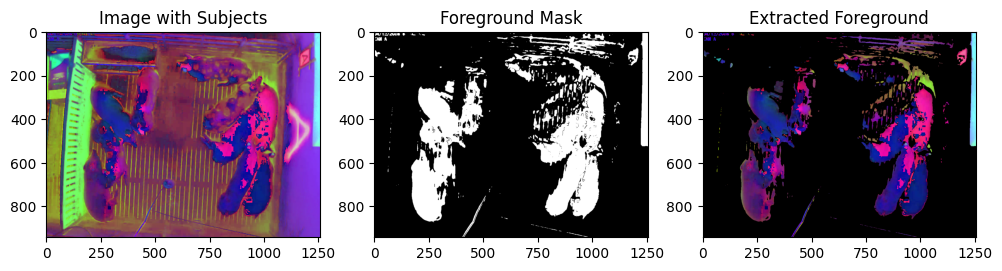

In [ ]:
import numpy as np
import imageio.v3 as iio
import matplotlib.pyplot as plt
import skimage
from skimage import io, morphology
from skimage.transform import resize
from skimage.filters import gaussian

# Load images
background = io.imread("background.png") / 255
background = background[..., :3] 
background = skimage.color.rgb2hsv(background)

path = "/data/bioeng/pigs/videosPenA_2018_12_04_9h04_12h14/1_Manual Record_2018-12-04 09-04-54_2018-12-04 09-17-31.mp4"
with_subjects = iio.imread(path, index=100)

# Resize frame to match background dimensions
with_subjects_resized = resize(with_subjects, background.shape, anti_aliasing=True)

with_subjects_resized =  skimage.color.rgb2hsv(with_subjects_resized)

print(with_subjects_resized.min(), with_subjects_resized.max(), background.min(), background.max())

background_blur = gaussian(background, sigma=1.5, channel_axis=-1)
with_subjects_blur = gaussian(with_subjects_resized, sigma=1.5, channel_axis=-1)

# Compute mean squared difference across RGB channels
diff = np.sqrt(((with_subjects_blur - background_blur) ** 2)).mean(axis=2)

# Compute threshold (Otsu)
threshold = 0.15

# Create foreground mask
foreground_mask = diff >= threshold

# Refining the mask
# foreground_mask = morphology.remove_small_objects(foreground_mask, 500)
# foreground_mask = morphology.closing(foreground_mask, morphology.disk(3))

# Apply mask to extract foreground
foreground = with_subjects_resized * foreground_mask[..., np.newaxis]
print(foreground_mask)

# Show results
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(with_subjects_resized)
ax[0].set_title("Image with Subjects")
ax[1].imshow(foreground_mask, cmap='gray')
ax[1].set_title("Foreground Mask")
ax[2].imshow(foreground)
ax[2].set_title("Extracted Foreground")
plt.show()
